In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img1 = cv2.imread('mole.jpg')
img2 = cv2.imread('opencv_logo-edit.png')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

In [ ]:
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
def nothing(x):
    pass

In [6]:
cv2.namedWindow('image')
cv2.createTrackbar('weight','image',0,100,nothing)
while(1):
    cv2.imshow('image',dst)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    weight = cv2.getTrackbarPos('weight','image')
    dst = cv2.addWeighted(img1,weight/100.,img2,1.-weight/100.,0)
cv2.destroyAllWindows()

In [54]:
img = np.zeros((400,512,3),np.uint8)
for i in range(255):
    img[:,i]=i
    img[:,256+i] = 255-i

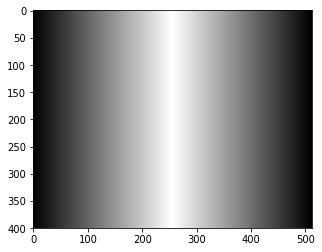

In [55]:
plt.imshow(img)

In [56]:
ret, mask = cv2.threshold(img,100,200,cv2.THRESH_BINARY)

In [57]:
def nothing(x):
    pass

cv2.namedWindow('image')
cv2.createTrackbar('b','image',0,250,nothing)
cv2.createTrackbar('c','image',0,255,nothing)

while(1):
    cv2.imshow('image',mask)
    k=cv2.waitKey(1)&0xFF
    if k==27:
        break
        
    # get current positions of four trackbars
    b=cv2.getTrackbarPos('b','image')
    c=cv2.getTrackbarPos('c','image')
    ret, mask=cv2.threshold(img,b,c, cv2.THRESH_BINARY)
        
cv2.destroyAllWindows()

In [12]:
ret

50.0

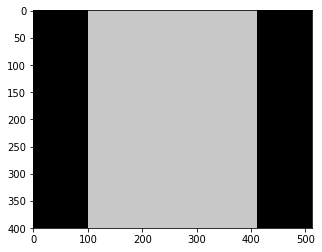

In [35]:
plt.imshow(mask)
plt.show()

In [29]:
mask_inv = cv2.bitwise_not(mask)

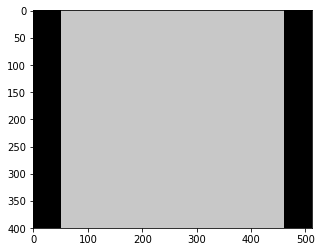

In [30]:
plt.imshow(mask)
plt.show()

In [48]:
# Load two images
img1 = cv2.imread('mole.jpg')
img2 = cv2.imread('opencv_logo-edit.png')

In [49]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

In [50]:
roi

array([[[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       ...,

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]]

In [40]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

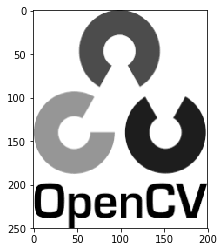

In [41]:
plt.imshow(img2gray, cmap='gray')
plt.show()

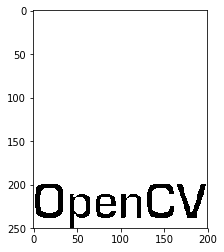

In [42]:
plt.imshow(mask, cmap='gray')
plt.show()

In [43]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

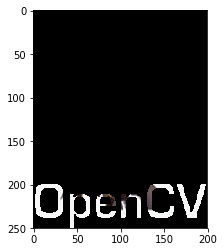

In [44]:
plt.imshow(img1_bg, cmap='gray')
plt.show()

In [45]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

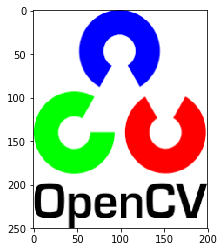

In [52]:
plt.imshow(img2_fg, cmap='gray')
plt.show()

In [53]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()